#### 多瑕疵图片的掩码生成

In [2]:
dict_class={'不导电':0,
            '擦花':1,
            '角位漏底':2,
            '桔皮':3,
            '漏底':4,
            '喷流':5, 
            '漆泡':6,
            '起坑':7,
            '杂色':8,
            '脏点':9}

In [3]:
base_dir='F:/lvcai/guangdong_round2_train_20181011/多瑕疵图片/'

In [20]:
import os 
import numpy as np
import matplotlib as pyplt
import pandas as pd
%matplotlib inline

In [7]:
df=pd.read_csv('json_duo.csv')

In [8]:
df

,file_name,label,x,y,w,h
0,"多瑕疵图片/不导电,脏点20180921085423对照样本.jpg",0,956,1028,353,49
1,"多瑕疵图片/不导电,脏点20180921085423对照样本.jpg",9,1046,960,57,43
2,"多瑕疵图片/不导电,脏点20180921085423对照样本.jpg",9,0,1022,30,47
3,"多瑕疵图片/不导电,脏点20180921085423对照样本.jpg",9,2320,1177,34,34
4,"多瑕疵图片/不导电,脏点20180921085507对照样本.jpg",0,0,948,738,453
5,"多瑕疵图片/不导电,脏点20180921085507对照样本.jpg",9,2352,1209,102,94
6,"多瑕疵图片/不导电,脏点20180921085557对照样本.jpg",0,9,975,2551,469
7,"多瑕疵图片/不导电,脏点20180921085557对照样本.jpg",9,1903,1107,29,41
8,"多瑕疵图片/不导电,脏点20180921085557对照样本.jpg",9,1240,1013,43,31
9,"多瑕疵图片/不导电,脏点20180921085557对照样本.jpg",9,1271,1201,214,45


In [18]:
df.iloc[0]['file_name'][:-4]

'多瑕疵图片/不导电,脏点20180921085423对照样本'

In [14]:
length = df.shape[0]
size=(480,640,10)

In [39]:
label_dir='F:/lvcai/guangdong_round2_train_20181011/label/'
for i in range(length):
    sample=df.iloc[i]
    file_name=sample['file_name']
    try:
        tnpy=np.load(label_dir+file_name[:-4]+'_label.npy')
    except:
        tnpy=np.zeros(size)
        
    tslice=tnpy[:,:,sample['label']]
    x_start=int((sample['y']*480) /1920) 
    x_end=int(((sample['y'] + sample['h'])*480) /1920) 
    y_start=int((sample['x']*640) /2560) 
    y_end=int(((sample['x']+sample['w'])*640) /2560)
        
    tslice[x_start:x_end, y_start:y_end]=1
    tnpy=tnpy.astype('int8')
    np.save(label_dir+sample['file_name'][:-4]+'_label.npy',tnpy)

In [23]:
sample=df.iloc[0]

In [24]:
sample

file_name    多瑕疵图片/不导电,脏点20180921085423对照样本.jpg
label                                         0
x                                           956
y                                          1028
w                                           353
h                                            49
Name: 0, dtype: object

In [31]:
try:
    tnpy=np.load(label_dir+sample['file_name'][:-4]+'.npy')
except:
    print("xx")
    tnpy=np.zeros(size)

xx


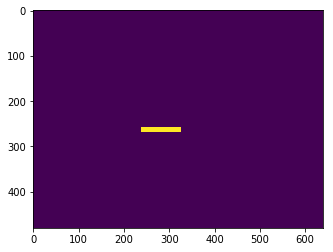

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
tslice=tnpy[:,:,sample['label']]
x_start=int((sample['y']*480) /1920) 
x_end=int(((sample['y'] + sample['h'])*480) /1920) 
y_start=int((sample['x']*640) /2560) 
y_end=int(((sample['x']+sample['w'])*640) /2560)
        
tslice[x_start:x_end, y_start:y_end]=1
plt.imshow(tslice)
tnpy=tnpy.astype('int8')
np.save(label_dir+sample['file_name'][:-4]+'_label.npy',tnpy)

In [38]:
try:
    tnpy=np.load(label_dir+sample['file_name'][:-4]+'_label.npy')
except FileNotFoundError:
    print("xx")
    tnpy=np.zeros(size)